## **Khai báo thư viện**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

## **Đọc dữ liệu**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/thieu1995/ai/master/data/preprocessing/international-airline-passengers.csv',parse_dates=True)

In [ ]:
df.head(5)

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## **Kiểm tra dữ liệu**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                                                                          Non-Null Count  Dtype 
---  ------                                                                          --------------  ----- 
 0   Month                                                                           144 non-null    object
 1   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
df.info

## **Xử lí dữ liệu**

In [ ]:
df.columns = ['date','Inter_Passengers']
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')
df = df.sort_index()
df.head()

,date,Inter_Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              144 non-null    datetime64[ns]
 1   Inter_Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
df = df.set_index('date')
df.head(5)

,Inter_Passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Inter_Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


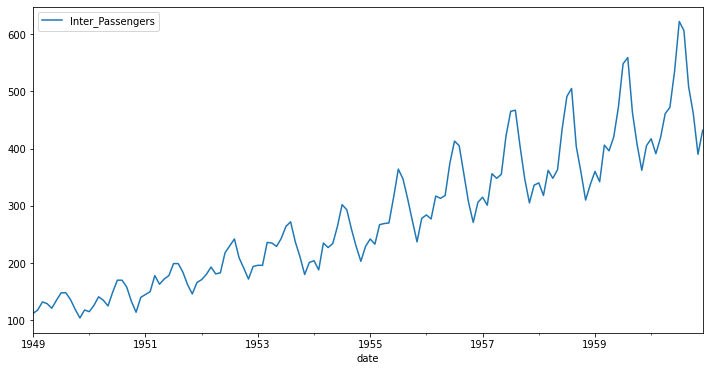

In [ ]:
df.plot(figsize=(12,6))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
results = seasonal_decompose(df['Inter_Passengers'])


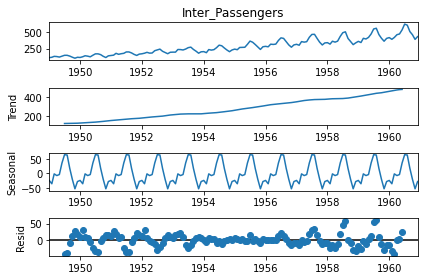

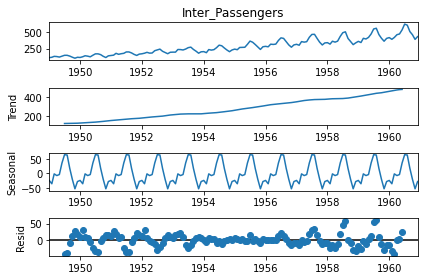

In [ ]:
results.plot()

In [ ]:
len(df)

144

In [ ]:
df.describe()

,Inter_Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


## **Chia tập train và test**

In [ ]:
train = df.iloc[:132]
test = df.iloc[132:]
print(train)
print(test)     

            Inter_Passengers
date                        
1949-01-01               112
1949-02-01               118
1949-03-01               132
1949-04-01               129
1949-05-01               121
...                      ...
1959-08-01               559
1959-09-01               463
1959-10-01               407
1959-11-01               362
1959-12-01               405

[132 rows x 1 columns]
            Inter_Passengers
date                        
1960-01-01               417
1960-02-01               391
1960-03-01               419
1960-04-01               461
1960-05-01               472
1960-06-01               535
1960-07-01               622
1960-08-01               606
1960-09-01               508
1960-10-01               461
1960-11-01               390
1960-12-01               432


## **Chuẩn hóa dữ liệu**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df.head(),df.tail()

(            Inter_Passengers
 date                        
 1949-01-01               112
 1949-02-01               118
 1949-03-01               132
 1949-04-01               129
 1949-05-01               121,             Inter_Passengers
 date                        
 1960-08-01               606
 1960-09-01               508
 1960-10-01               461
 1960-11-01               390
 1960-12-01               432)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
print(scaled_train.shape)
print(scaled_test.shape)

(132, 1)
(12, 1)


In [ ]:
scaled_train[:10]

array([[0.01758242],
       [0.03076923],
       [0.06153846],
       [0.05494505],
       [0.03736264],
       [0.06813187],
       [0.0967033 ],
       [0.0967033 ],
       [0.07032967],
       [0.03296703]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

## **Chuẩn bị dữ liệu cho mô hình**

In [ ]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
generator

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this : \n {y}')
     

Given the Array: 
[0.01758242 0.03076923 0.06153846]
Predict this : 
 [[0.05494505]]


In [ ]:
X.shape

(1, 3, 1)

In [ ]:
# n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

## **Xây dựng mô hình**

In [ ]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
LSTM?

In [ ]:
n_input

12

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 43,351
Trainable params: 43,351
Non-trainable params: 0
_________________________________________________________________


## **Huấn luyện mô hình**

In [ ]:
model.fit(generator,epochs=50)

Epoch 1/50
120/120 [==============================] - 2s 7ms/step - loss: 0.0247
Epoch 2/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0112
Epoch 3/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0109
Epoch 4/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0100
Epoch 5/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0086
Epoch 6/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0106
Epoch 7/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0066
Epoch 8/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0060
Epoch 9/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0045
Epoch 10/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0034
Epoch 11/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0044
Epoch 12/50
120/120 [==============================] - 1s 7ms/step - loss: 0.0048
Epoch 13/50
120/120 [====

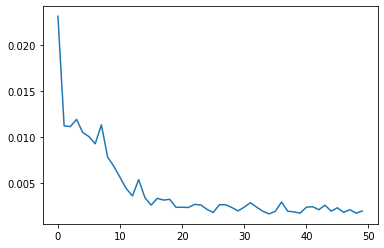

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## **Dự đoán mô hình**

In [ ]:
last_train_batch = scaled_train[-12:]

In [ ]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 214ms/step


array([[0.62006074]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.68791209])

In [ ]:

test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # lay gia tri du doan dau tien
    current_pred = model.predict(current_batch)[0]
    
    # append du doan vao mang
    test_predictions.append(current_pred) 
    
    # su dung su doan de cap nhat va xoa gia tri dau tien
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
     

1/1 [==============================] - 0s 18ms/step


In [ ]:

test_predictions

[array([0.62006074], dtype=float32),
 array([0.62283087], dtype=float32),
 array([0.6736948], dtype=float32),
 array([0.6872108], dtype=float32),
 array([0.7492227], dtype=float32),
 array([0.8727059], dtype=float32),
 array([1.0214559], dtype=float32),
 array([1.0658225], dtype=float32),
 array([0.9007449], dtype=float32),
 array([0.7577741], dtype=float32),
 array([0.69176996], dtype=float32),
 array([0.6995393], dtype=float32)]

## **Dự báo của mô hình**

In [ ]:
test.head()

,Inter_Passengers
date,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472


In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:

test['Inter_Passengers_pre'] = true_predictions

<ipython-input-41-77ed6d8a73e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Inter_Passengers_pre'] = true_predictions


In [ ]:
test.head(12)

,Inter_Passengers,Inter_Passengers_pre
date,,
1960-01-01,417,386.127638
1960-02-01,391,387.388045
1960-03-01,419,410.531129
1960-04-01,461,416.680913
1960-05-01,472,444.896327
1960-06-01,535,501.081174
1960-07-01,622,568.762427
1960-08-01,606,588.949229
1960-09-01,508,513.838936


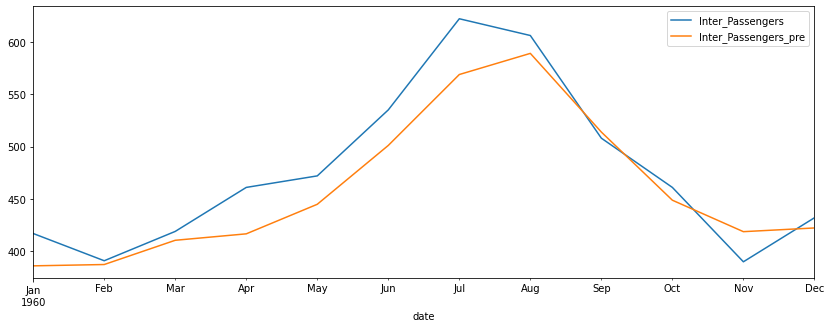

In [ ]:

test.plot(figsize=(14,5))

In [ ]:

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Inter_Passengers'],test['Inter_Passengers_pre']))
print(rmse)
     

27.562817402620723
